In [1]:
import extcolors
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import requests

from PIL import Image
from environment.settings import config

dataset_dir = config['DATASET_DIR']
database_dir = config['DATABASE_DIR']

In [2]:
color_palette = {'black':      (0, 0, 0),
                 'silver':     (192, 192, 192),
                 'gray': 	   (128, 128, 128),
                 'beige':      (255, 218, 185),
                 'white': 	   (255, 255, 255),
                 'maroon': 	   (128, 0, 0),
                 'lightbrown': (205, 133, 63),
                 'red': 	   (255, 0, 0),
                 'lightred':   (240, 128, 128),
                 'purple': 	   (128, 0, 128),
                 'fuchsia':    (255, 0, 255),
                 'green': 	   (0, 128, 0),
                 'lime': 	   (0, 255, 0),
                 'olive': 	   (128, 128, 0),
                 'yellow': 	   (255, 255, 0),
                 'navy': 	   (0, 0, 128),
                 'blue': 	   (0, 0, 255),
                 'teal': 	   (0, 128, 128),
                 'aqua': 	   (0, 255, 255),
                 'orange':     (255, 165, 0)}

In [3]:
def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image

In [4]:
Academy = pd.read_csv(dataset_dir+'Academy.csv')
Apprenticeship = pd.read_csv(dataset_dir+'Apprenticeship.csv')
Artist = pd.read_csv(dataset_dir+'Artist.csv')
ArtistEducation = pd.read_csv(dataset_dir+'ArtistEducation.csv')
ArtistMovement = pd.read_csv(dataset_dir+'ArtistMovements.csv')
ArtistPictures = pd.read_csv(dataset_dir+'ArtistPicture.csv')
ArtistSpecialization = pd.read_csv(dataset_dir+'ArtistSpecializations.csv')
Artwork = pd.read_csv(dataset_dir+'Artwork.csv')
Generated = pd.read_csv(dataset_dir+'Generated.csv')
Medium = pd.read_csv(dataset_dir+'Medium.csv')
Movement = pd.read_csv(dataset_dir+'Movement.csv')
Place = pd.read_csv(dataset_dir+'Places.csv')
Recommendation = pd.read_csv(dataset_dir+'Recommendation.csv')
Specialization = pd.read_csv(dataset_dir+'specialization.csv')

In [5]:
def url2array(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return np.array(img)

def url2img(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

In [6]:
img_series = Artwork.image_url[0:5].apply(lambda x: url2img(x))

In [ ]:
def analyze(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]

    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    plt.savefig("results/my_pie.png")
    print("Found the following colors:\n")
    for color in hex_colors:
      print(color)

In [ ]:
colors = extcolors.extract_from_image(img_series[4])
rgb_colors = list(map(lambda x: x[0], colors[0]))

In [ ]:
img_series[4]

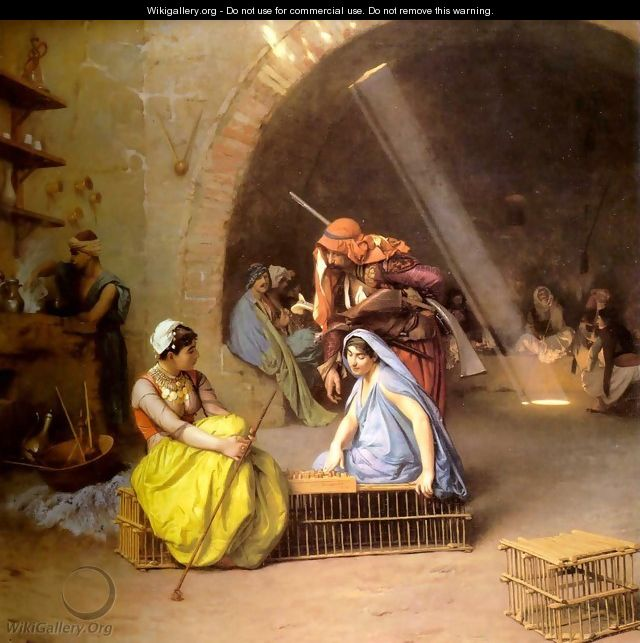

In [8]:
url = Artwork.image_url[123]
arr = url2array(url)
img = url2img(url)

distance_matrix = np.zeros((arr.shape[0], arr.shape[1], len(color_palette.values())))
for i, color in enumerate(color_palette.values()):
    dist_arr = np.sqrt( (arr[:, :, 0] - color[0])**2 + (arr[:, :, 1] - color[1])**2 + (arr[:, :, 2] - color[2])**2  )
    distance_matrix[:, :, i] = dist_arr
    
mat_colors = np.zeros((arr.shape[0], arr.shape[1]))
for x in range(distance_matrix.shape[0]):
    for y in range(distance_matrix.shape[1]):
        mat_colors[x, y] = distance_matrix[x, y, :].argmin()
        
i_colors, color_frequencies = np.unique(mat_colors, return_counts=True)
color_frequencies = (color_frequencies / mat_colors.size * 100).round(1)
i_colors = i_colors.astype(int)

fig = go.Figure()

color_values = list(color_palette.values())
color_values = list(map(lambda x: 'rgb'+str(x), color_values))


bar = go.Bar(
    y=color_frequencies,
    marker=dict(color=color_values)
)
    
fig.add_trace(bar)
# print(color_values[i])
fig.show()
img

In [ ]:
x = np.array([0,0,1,1])
y = np.array([0,1,1,0])

fig = go.Figure()


for i, color in enumerate(color_palette.items()):
    sc = go.Scatter(
            x=x, y=y, showlegend=False, name=color[0],
            fill='toself', mode='lines',
            fillcolor='rgb'+str(color[1])
         )
    fig.add_trace(sc)
    x += 1    

fig